<a href="https://colab.research.google.com/github/KhannaShivang/Stock-price-predictor/blob/main/StockPeicePridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [ ]:
stock='GOOG'
google_data=yf.download(stock,start,end);

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.shape

(5034, 6)

In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,45.813599,46.297977,45.357106,45.836563,45.786685,1.150125e+08
std,43.942015,44.430381,43.514702,43.979166,43.935771,1.491640e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.075988,13.183833,12.924992,13.078790,13.063924,2.721592e+07
50%,27.084810,27.355448,26.896904,27.079404,27.048623,5.452160e+07
75%,60.737500,61.299999,60.210627,60.776625,60.707542,1.415596e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-08-30 to 2024-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [ ]:
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google stock")

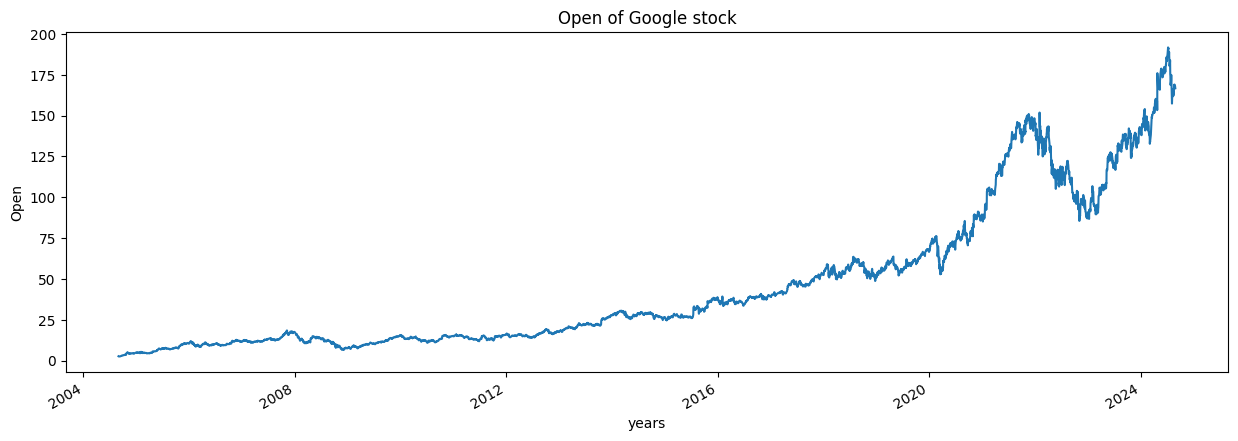

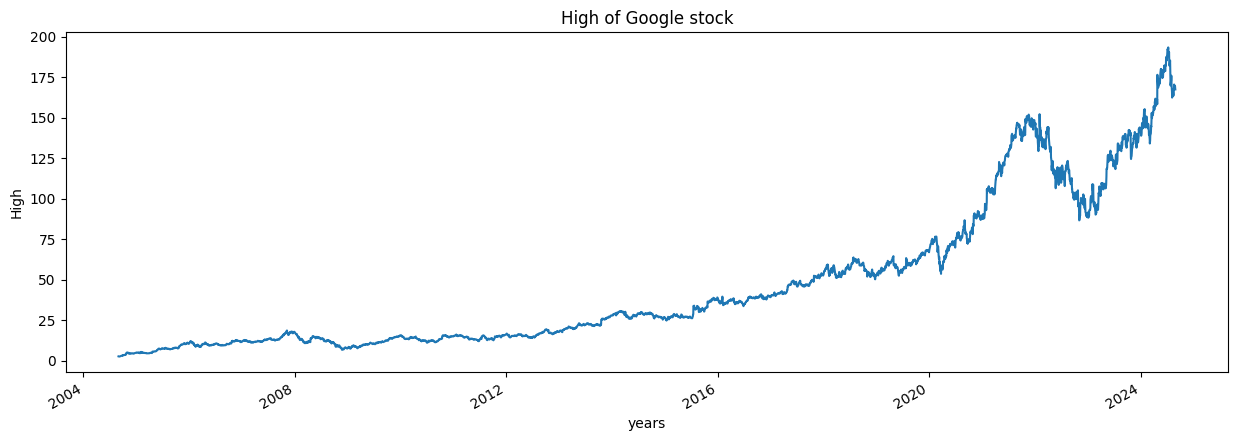

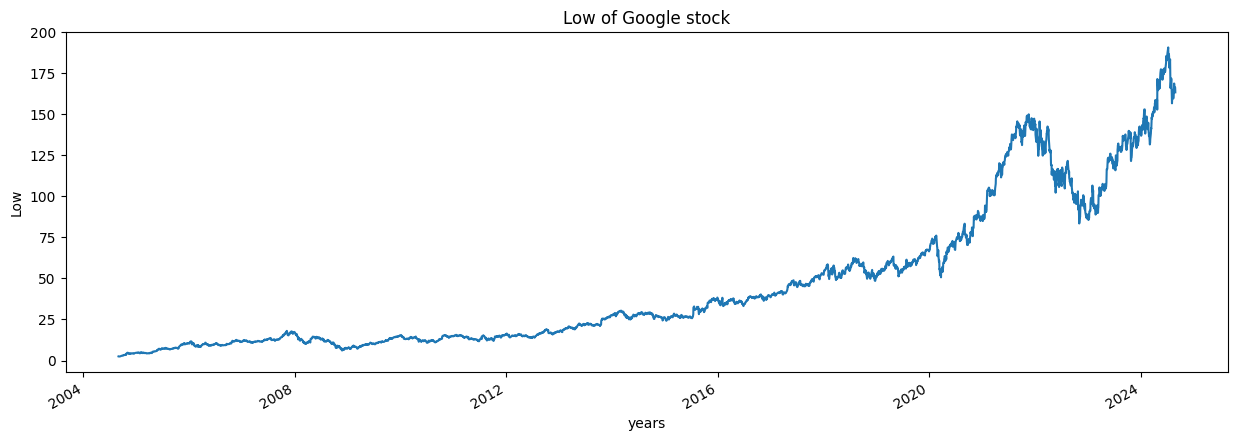

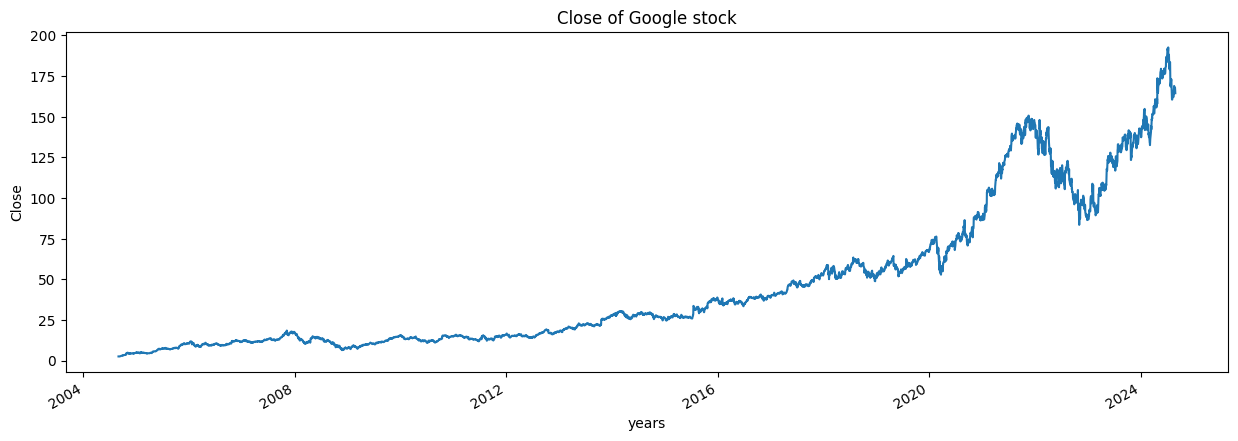

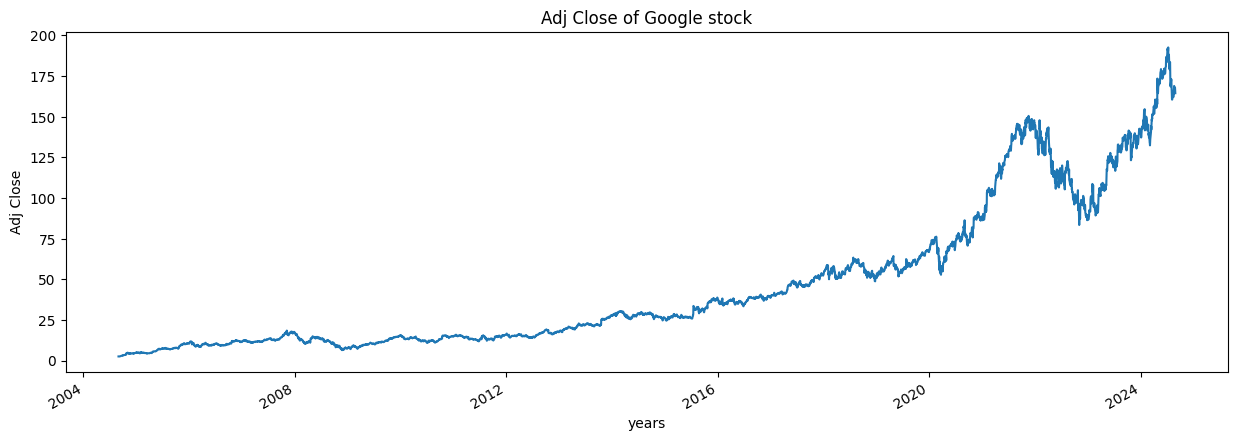

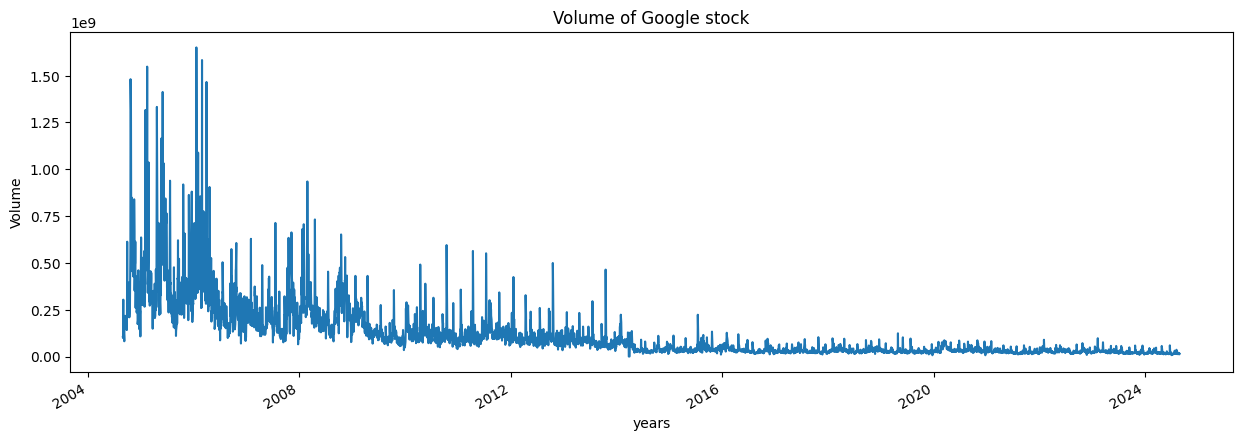

In [ ]:
for column_name in google_data.columns:
    plot_graph((15,5),google_data[column_name],column_name)

In [ ]:
google_data['MA_for 250_days']=google_data['Adj Close'].rolling(250).mean()
google_data['MA_for 250_days'][0:250].tail()

,MA_for 250_days
Date,
2005-08-18,NaN
2005-08-19,NaN
2005-08-22,NaN
2005-08-23,NaN
2005-08-24,5.150114


<Figure size 640x480 with 0 Axes>

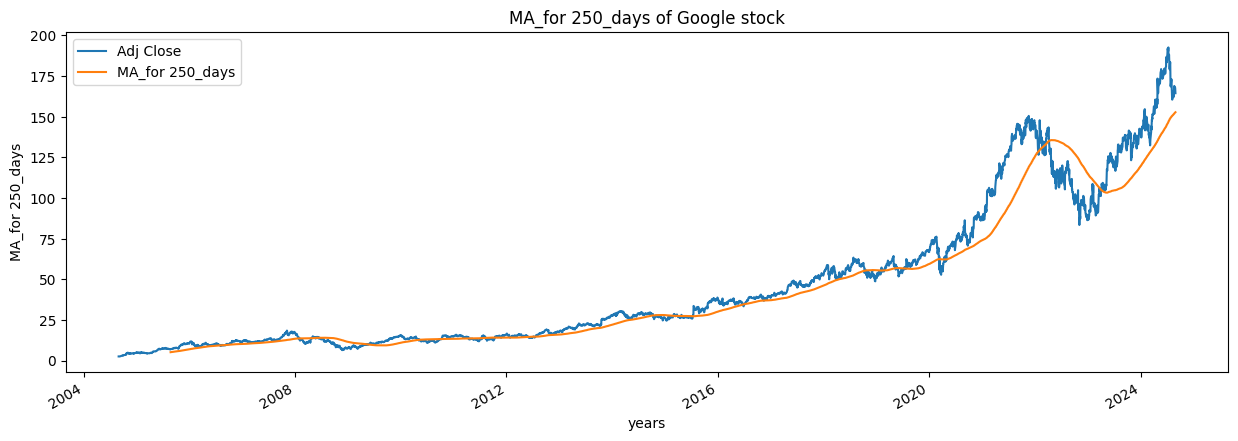

In [ ]:
plot_graph((15,5),google_data[['Adj Close','MA_for 250_days']],'MA_for 250_days')

##PRE PROCESSING

<Figure size 640x480 with 0 Axes>

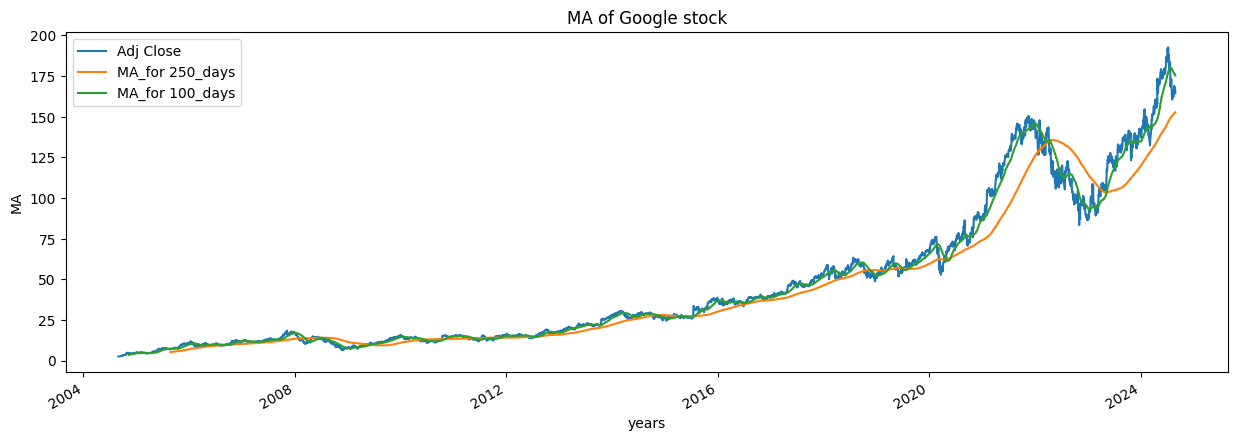

In [ ]:
google_data['MA_for 100_days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for 250_days','MA_for 100_days']],'MA')

<Figure size 640x480 with 0 Axes>

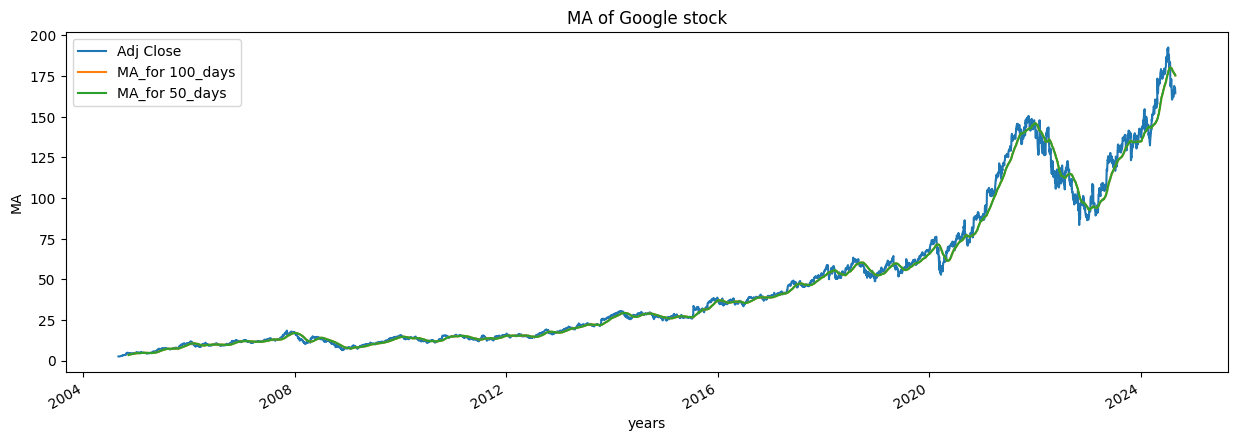

In [ ]:
google_data['MA_for 50_days']=google_data['Adj Close'].rolling(50).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for 100_days','MA_for 50_days']],'MA')

In [ ]:
Adj_close_price=google_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Adj_close_price=scaler.fit_transform(Adj_close_price)
Adj_close_price
len(Adj_close_price)

5034

In [ ]:
x_data=[]
y_data=[]
for i in range(100,len(Adj_close_price)):
    x_data.append(Adj_close_price[i-100:i])
    y_data.append(Adj_close_price[i])

import numpy as np
x_data=np.array(x_data)
y_data=np.array(y_data)


##**DATA SPLITING**
  

70% Train data
  
  30% Test data

In [ ]:
train_data = int(len(x_data)*0.7)
test_data = len(x_data) -100 - train_data

In [ ]:
x_train=x_data[:train_data]
y_train=y_data[:train_data]
x_test=x_data[train_data:]
y_test=y_data[train_data:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 3.8563e-05
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 3.1795e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
pridictions = model.predict(x_test)
inv_pridictions = scaler.inverse_transform(pridictions)
inv_pridictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[ 56.83697],
       [ 56.54205],
       [ 53.89033],
       ...,
       [156.31752],
       [157.30157],
       [155.76074]], dtype=float32)

In [ ]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test

array([[ 56.87627792],
       [ 53.99955368],
       [ 53.90465927],
       ...,
       [167.92999268],
       [166.38000488],
       [164.5       ]])

In [ ]:
import pandas as pd
rms = np.sqrt(np.mean((inv_pridictions-inv_y_test)**2))
ploting_data = pd.DataFrame(
    {
        'Origional_text_data':inv_y_test.reshape(-1),
        'Predicted_data':inv_pridictions.reshape(-1)
    } ,
    index=google_data.index[train_data+100:len(google_data)]
)
ploting_data

,Origional_text_data,Predicted_data
Date,,
2018-10-09,56.876278,56.836971
2018-10-10,53.999554,56.542049
2018-10-11,53.904659,53.890331
2018-10-12,55.440914,53.612614
2018-10-15,54.550423,55.411148
...,...,...
2024-08-22,165.490005,156.648163
2024-08-23,167.429993,154.228836
2024-08-26,167.929993,156.317520


<Figure size 640x480 with 0 Axes>

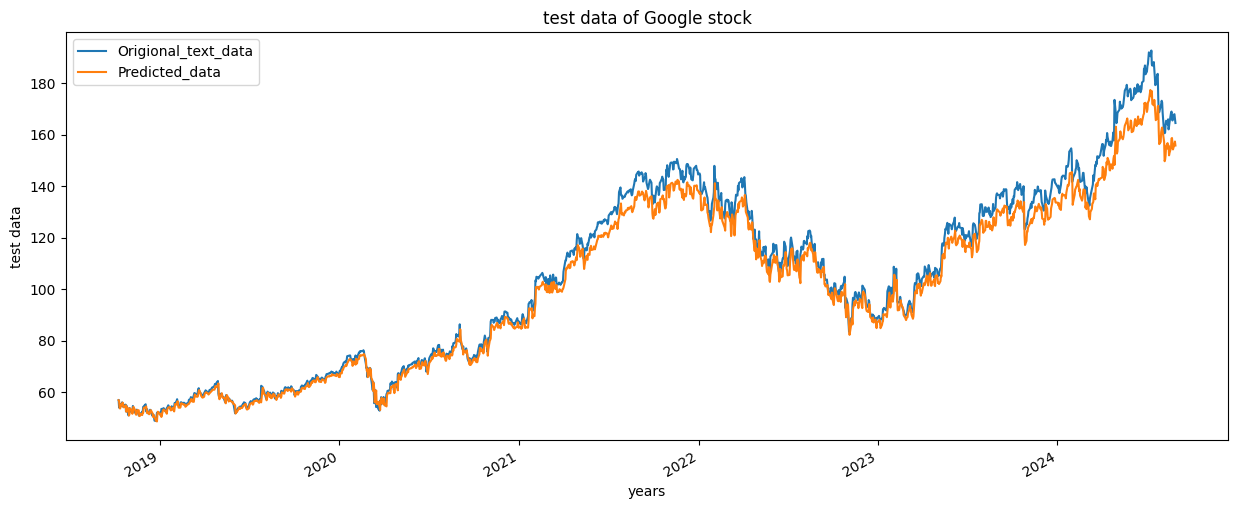

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

array([[0.28578818],
       [0.28423735],
       [0.27029356],
       ...,
       [0.80889666],
       [0.81407124],
       [0.8059689 ]], dtype=float32)

<Figure size 640x480 with 0 Axes>

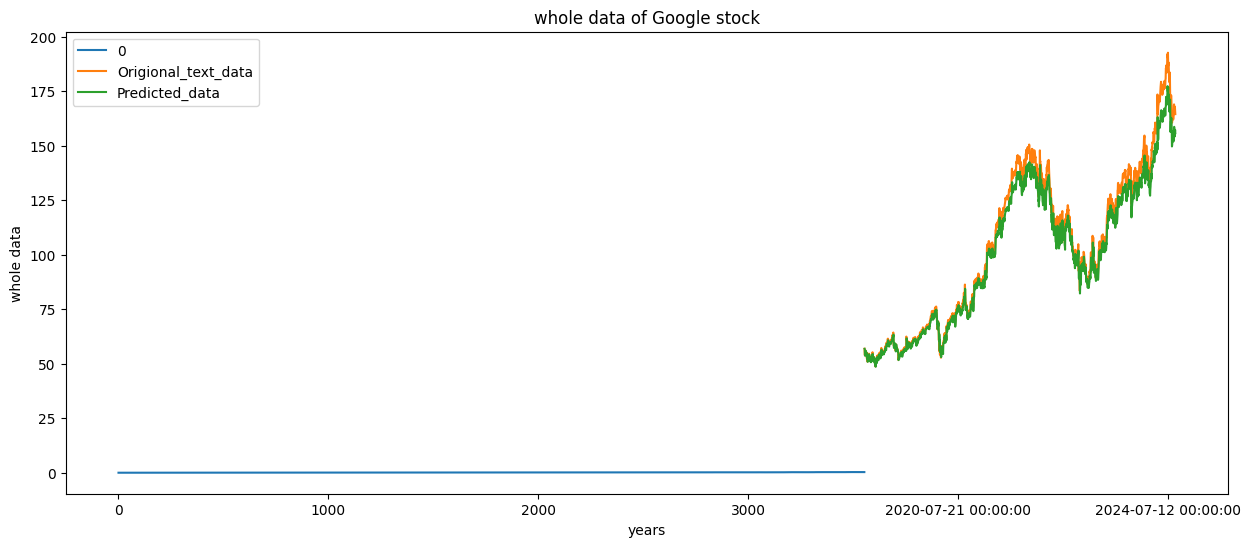

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:train_data+100],ploting_data],axis=0)  , 'whole data')


In [ ]:
accuracy = 100 - (rms / np.mean(inv_y_test)) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 94.81%


In [ ]:
model.save("Latest_stock_price_model.keras")